# Exploratory Data Analysis (EDA): London Bike Sharing Dataset

This notebook explores the dataset to gain insights about factors influencing bike rentals in London. 


In [112]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = "../data/transformed_london_merged.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,number_of_rentals,season,month,day,weekday,hour,is_holiday,is_weekend,temp_C,perceived_temp_C,humidity_percent,wind_speed_kmh,weather_code
0,182,3,1,4,6,0,0,1,3.00,2.00,93.00,6.00,3
1,138,3,1,4,6,1,0,1,3.00,2.50,93.00,5.00,1
2,134,3,1,4,6,2,0,1,2.50,2.50,96.50,0.00,1
3,72,3,1,4,6,3,0,1,2.00,2.00,100.00,0.00,1
4,47,3,1,4,6,4,0,1,2.00,0.00,93.00,6.50,1


In [113]:
# columns
print(f"Columns: {df.columns}")

# Dataset overview
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()


Columns: Index(['number_of_rentals', 'season', 'month', 'day', 'weekday', 'hour',
       'is_holiday', 'is_weekend', 'temp_C', 'perceived_temp_C',
       'humidity_percent', 'wind_speed_kmh', 'weather_code'],
      dtype='object')
Dataset Shape: (17414, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   number_of_rentals  17414 non-null  int64  
 1   season             17414 non-null  int64  
 2   month              17414 non-null  int64  
 3   day                17414 non-null  int64  
 4   weekday            17414 non-null  int64  
 5   hour               17414 non-null  int64  
 6   is_holiday         17414 non-null  int64  
 7   is_weekend         17414 non-null  int64  
 8   temp_C             17414 non-null  float64
 9   perceived_temp_C   17414 non-null  float64
 10  humidity_percent   17414 non-null  fl

# Basic Statistics

In [115]:
# Set displayed precision of floating point values
pd.options.display.float_format = '{:.2f}'.format

# Descriptive values
df.describe()

,number_of_rentals,season,month,day,weekday,hour,is_holiday,is_weekend,temp_C,perceived_temp_C,humidity_percent,wind_speed_kmh,weather_code
count,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00,17414.00
mean,1143.10,1.49,6.51,15.75,2.99,11.51,0.02,0.29,12.47,11.52,72.32,15.91,2.72
std,1085.11,1.12,3.45,8.79,2.00,6.92,0.15,0.45,5.57,6.62,14.31,7.89,2.34
min,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,-1.50,-6.00,20.50,0.00,1.00
25%,257.00,0.00,4.00,8.00,1.00,6.00,0.00,0.00,8.00,6.00,63.00,10.00,1.00
50%,844.00,1.00,7.00,16.00,3.00,12.00,0.00,0.00,12.50,12.50,74.50,15.00,2.00
75%,1671.75,2.00,10.00,23.00,5.00,18.00,0.00,1.00,16.00,16.00,83.00,20.50,3.00
max,7860.00,3.00,12.00,31.00,6.00,23.00,1.00,1.00,34.00,34.00,100.00,56.50,26.00


# Unique values

In [116]:
# Liczba unikalnych wartości w każdej kolumnie
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



Unique values in each column:
number_of_rentals: 3781 unique values
season: 4 unique values
month: 12 unique values
day: 31 unique values
weekday: 7 unique values
hour: 24 unique values
is_holiday: 2 unique values
is_weekend: 2 unique values
temp_C: 73 unique values
perceived_temp_C: 82 unique values
humidity_percent: 143 unique values
wind_speed_kmh: 103 unique values
weather_code: 7 unique values


# Categorical / Numerical features split

In [117]:
# Podział kolumn
categorical_cols = ["season", "weekday", "is_holiday", "is_weekend", "weather_code"]

numerical_cols = ["temp_C", "perceived_temp_C", "humidity_percent", "wind_speed_kmh", "hour", "day", "month"]

# Distribution of the target variable

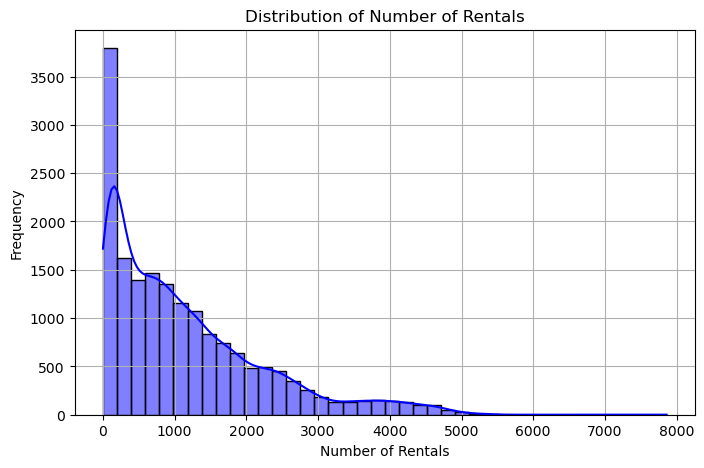

In [118]:
# Rozkład zmiennej celu (number_of_rentals)
plt.figure(figsize=(8, 5))
sns.histplot(df["number_of_rentals"], bins=40, kde=True, color="blue")
plt.title("Distribution of Number of Rentals")
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Numerical features distribution

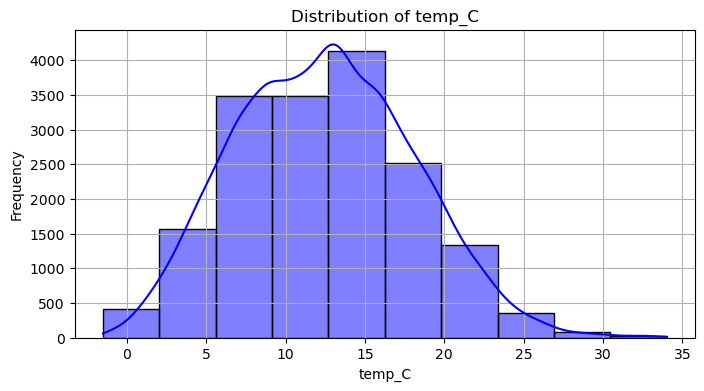

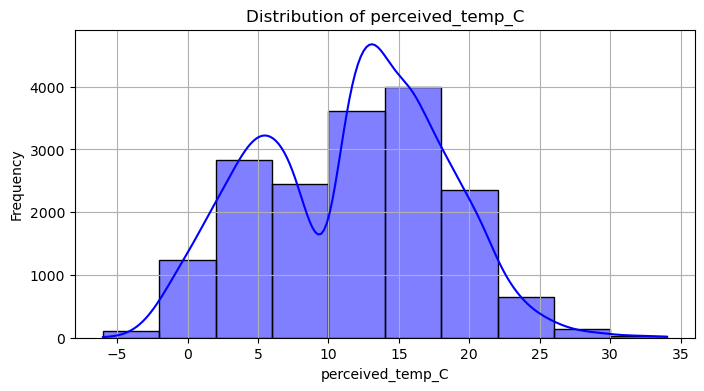

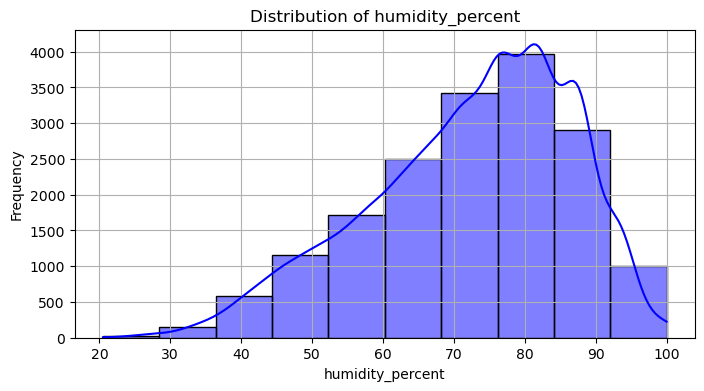

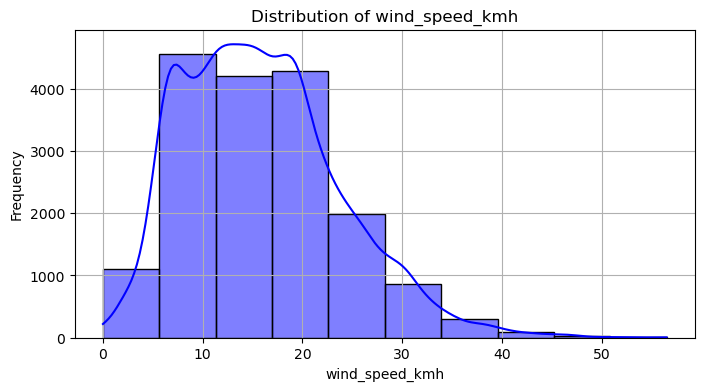

In [119]:
# Histogramy dla zmiennych numerycznych

excluded_from_distribution = ['month', 'day', 'hour']
numericals_for_distribution = [col for col in numerical_cols if col not in excluded_from_distribution]
for col in numericals_for_distribution:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=10, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

# Categorical features distribution

In [120]:
# Mapowanie kategorii
season_labels = {0: "Spring", 1: "Summer", 2: "Fall", 3: "Winter"}
month_labels = {0: "Jan", 1: "Feb", 2: "Mar", 3: "Apr", 4: "May", 5: "Jun", 6: "Jul", 7: "Aug", 8: "Sep", 9: "Oct", 10: "Nov", 11: "Dec"}
weekday_labels = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
weather_labels = {
    1: "Clear", 2: "Few Clouds", 3: "Broken Clouds", 4: "Cloudy",
    7: "Rain", 10: "Thunderstorm", 26: "Snowfall", 94: "Freezing Fog"
}

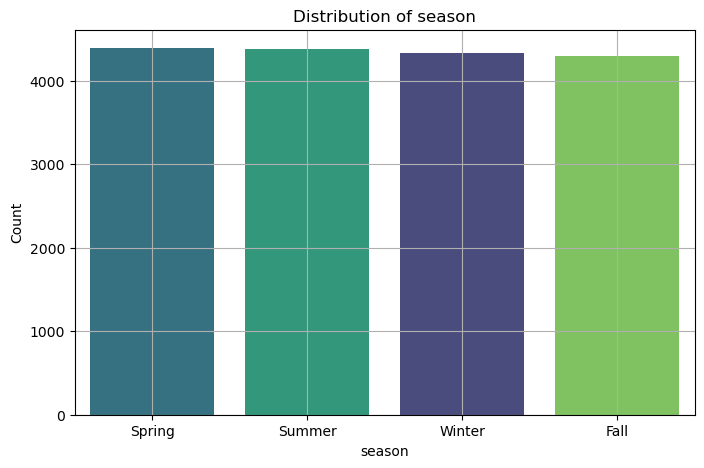

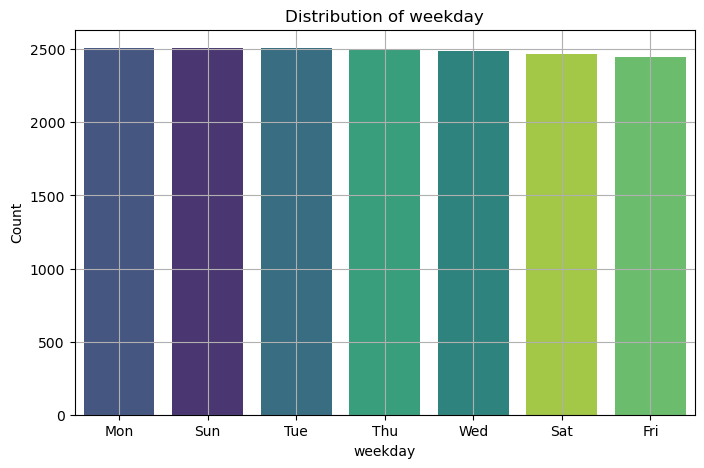

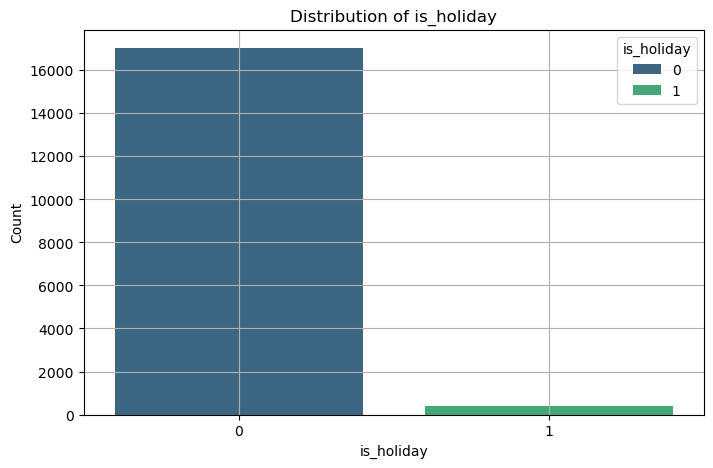

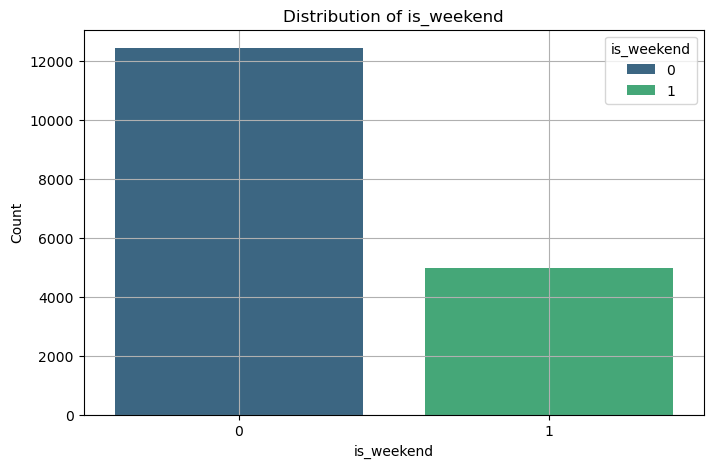

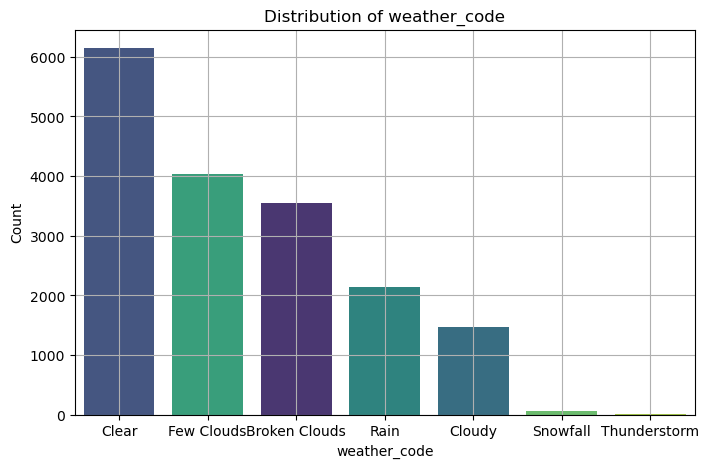

In [121]:
# Wykresy z mapowaniem
for col in categorical_cols:
    if col == "season":
        mapped_col = df[col].map(season_labels)
    elif col == "weekday":
        mapped_col = df[col].map(weekday_labels)
    elif col == "weather_code":
        mapped_col = df[col].map(weather_labels)
    else:
        mapped_col = df[col]
    
    plt.figure(figsize=(8, 5))
    sns.countplot(x=mapped_col, order=mapped_col.value_counts().index, palette="viridis", hue=mapped_col)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid()
    plt.show()


# Correlation Matrix

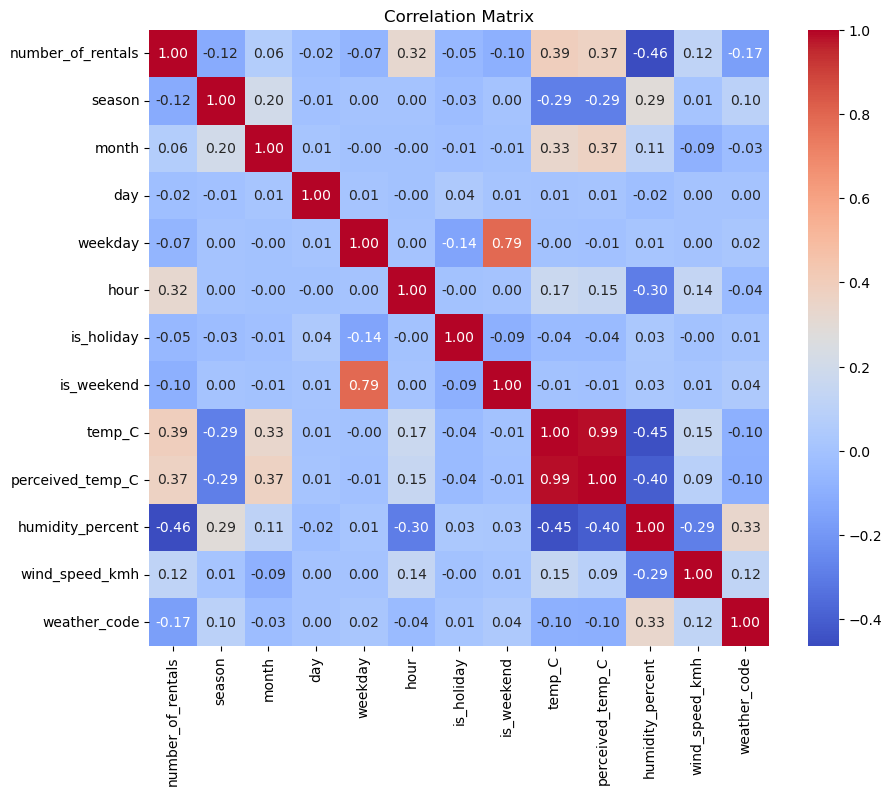

In [122]:
# Korelacja między zmiennymi numerycznymi
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Numerical features correlations with target

Correlation of numerical features with 'number_of_rentals':
number_of_rentals    1.00
temp_C               0.39
perceived_temp_C     0.37
hour                 0.32
wind_speed_kmh       0.12
month                0.06
day                 -0.02
humidity_percent    -0.46
Name: number_of_rentals, dtype: float64


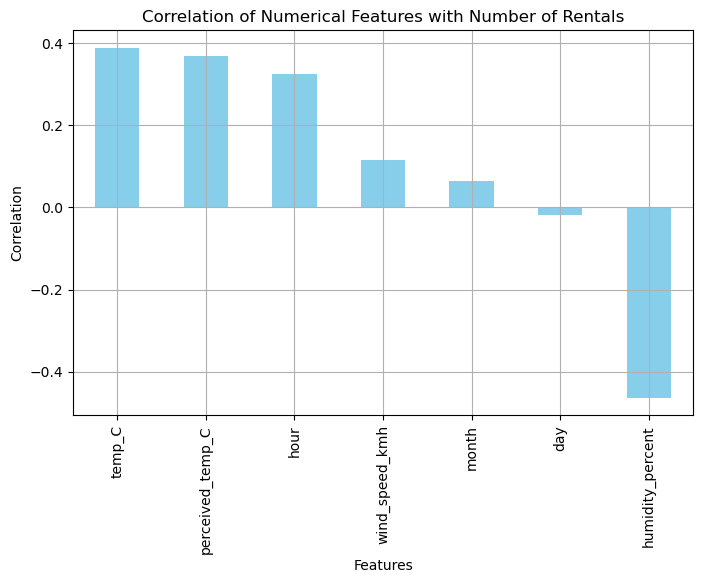

In [123]:
# Numerical features list
num_cols = numerical_cols.append("number_of_rentals")

# Calculate correlations
correlations_with_target = df[numerical_cols].corr()["number_of_rentals"].sort_values(ascending=False)

# Display correlations
print("Correlation of numerical features with 'number_of_rentals':")
print(correlations_with_target)

# Wykres korelacji
plt.figure(figsize=(8, 5))
correlations_with_target[1:].plot(kind="bar", color="skyblue")
plt.title("Correlation of Numerical Features with Number of Rentals")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.grid()
plt.show()


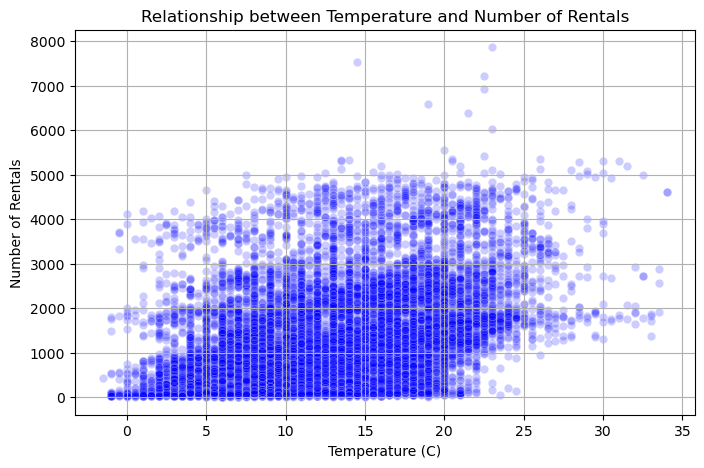

In [124]:
# Scatterplot dla 'temp_C' a 'number_of_rentals'
plt.figure(figsize=(8, 5))
sns.scatterplot(x="temp_C", y="number_of_rentals", data=df, alpha=0.2, color="blue")
plt.title("Relationship between Temperature and Number of Rentals")
plt.xlabel("Temperature (C)")
plt.ylabel("Number of Rentals")
plt.grid()
plt.show()

# Categorical features correlations with target

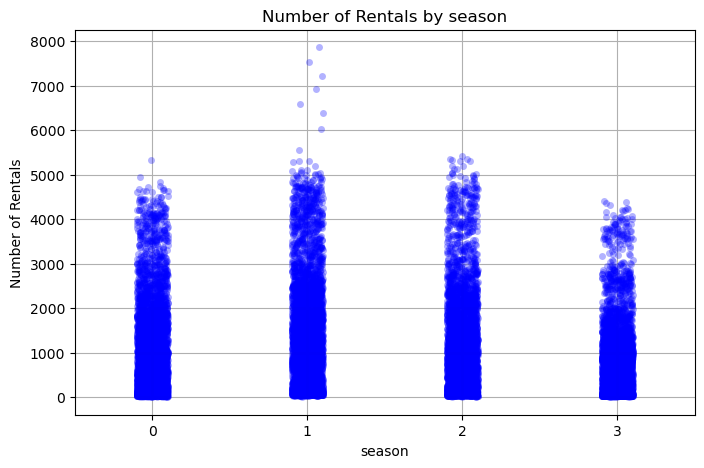

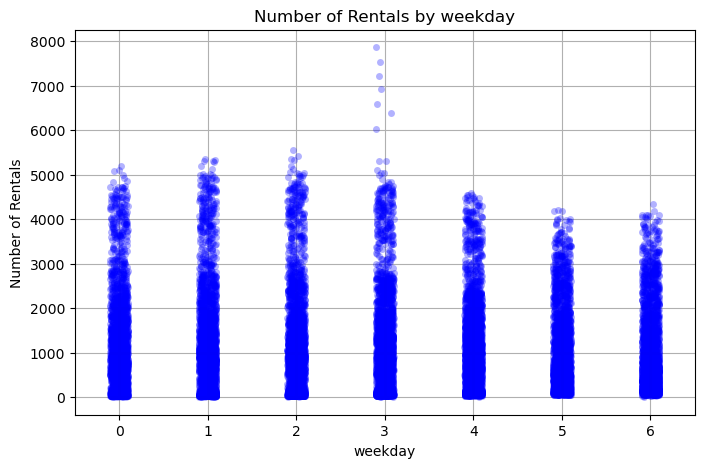

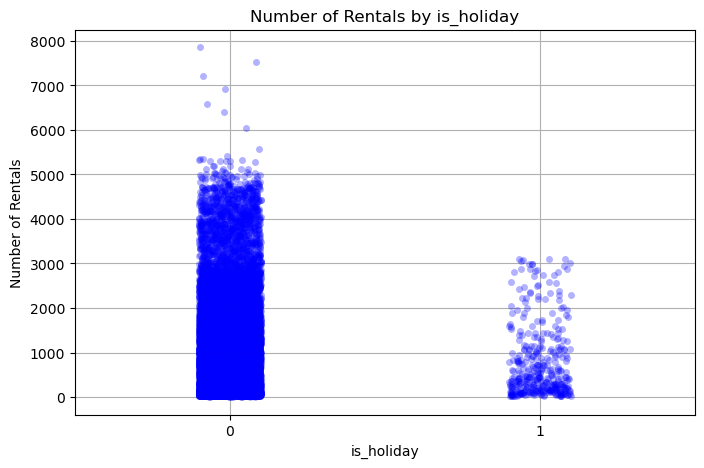

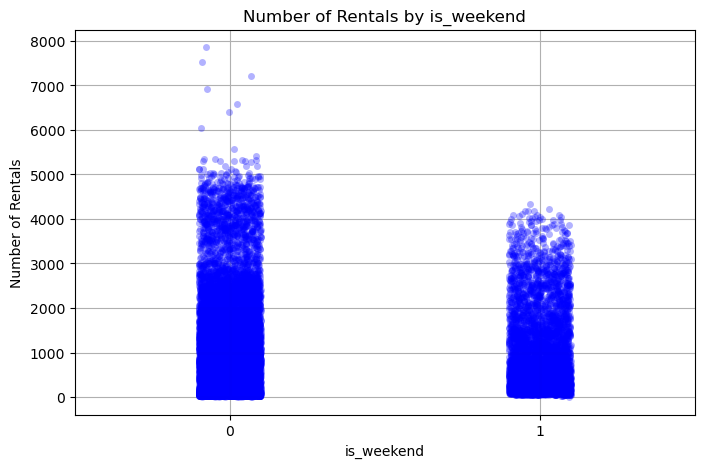

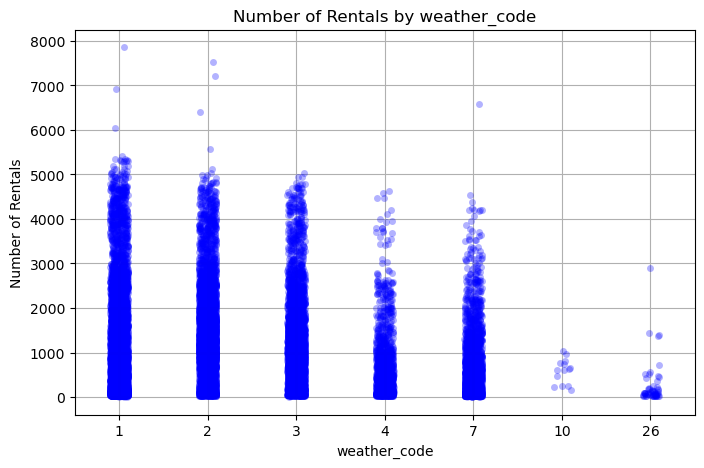

In [125]:
# Strip plot dla zmiennych kategorycznych
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.stripplot(x=col, y="number_of_rentals", data=df, alpha=0.3, jitter=True, color="blue")
    plt.title(f"Number of Rentals by {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Rentals")
    plt.grid()
    plt.show()




# Seasonality / Time trends

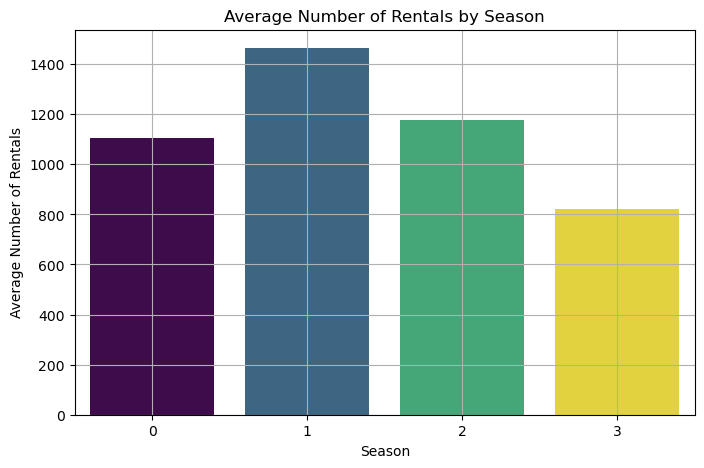

In [126]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["season"], y="number_of_rentals", hue="season", data=df, errorbar=None, palette="viridis", dodge=False)
plt.title("Average Number of Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Number of Rentals")
plt.legend([],[], frameon=False)  # Usunięcie legendy, jeśli jest zbędna
plt.grid()
plt.show()


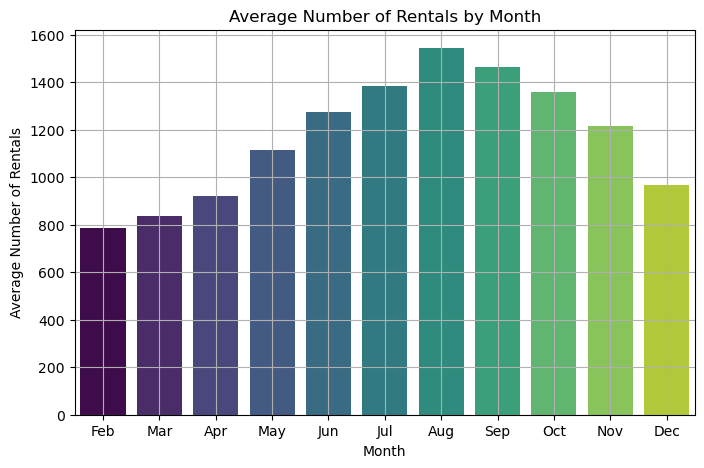

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df["month"].map(month_labels), y="number_of_rentals", hue="month", data=df, errorbar=None, palette="viridis", dodge=False)
plt.title("Average Number of Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Number of Rentals")
plt.legend([],[], frameon=False)  # Usunięcie legendy, jeśli jest zbędna
plt.grid()
plt.show()

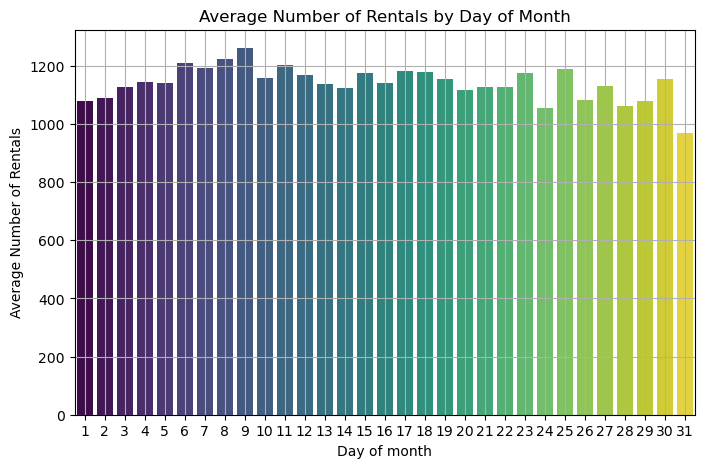

In [94]:
plt.figure(figsize=(8, 5))
sns.barplot(x="day", y="number_of_rentals", hue="day", data=df, errorbar=None, palette="viridis", dodge=False)
plt.title("Average Number of Rentals by Day of Month")
plt.xlabel("Day of month")
plt.ylabel("Average Number of Rentals")
plt.legend([],[], frameon=False)  # Usunięcie legendy, jeśli jest zbędna
plt.grid()
plt.show()

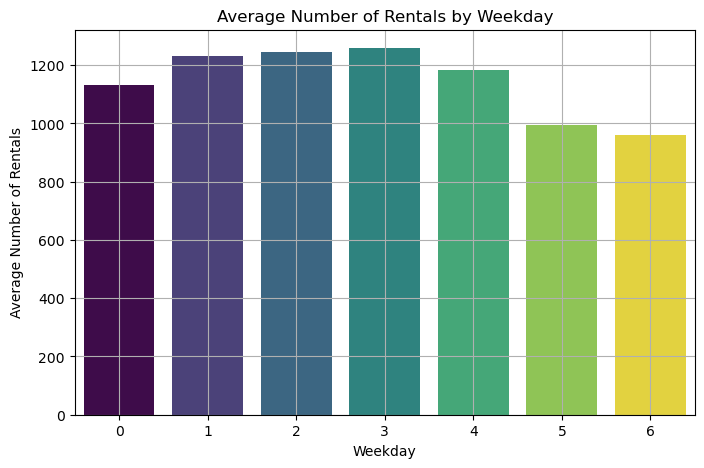

In [108]:
plt.figure(figsize=(8, 5))
sns.barplot(x="weekday", y="number_of_rentals", hue="weekday", data=df, errorbar=None, palette="viridis", dodge=False)
plt.title("Average Number of Rentals by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Number of Rentals")
plt.legend([],[], frameon=False)  # Usunięcie legendy, jeśli jest zbędna
plt.grid()
plt.show()

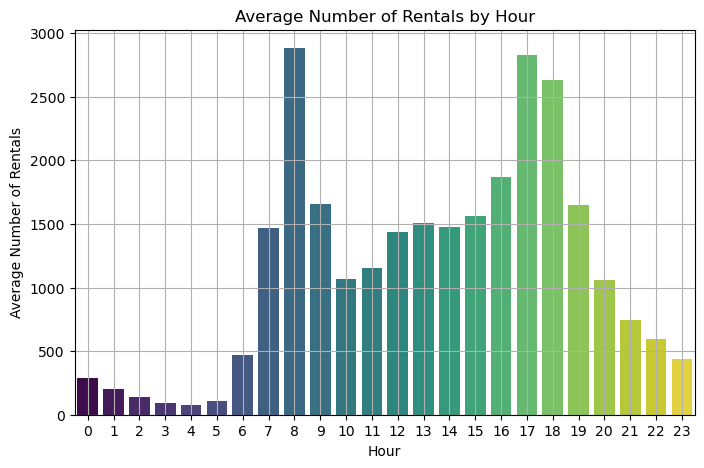

In [109]:
plt.figure(figsize=(8, 5))
sns.barplot(x="hour", y="number_of_rentals", hue="hour", data=df, errorbar=None, palette="viridis", dodge=False)
plt.title("Average Number of Rentals by Hour")
plt.xlabel("Hour")
plt.ylabel("Average Number of Rentals")
plt.legend([],[], frameon=False)  # Usunięcie legendy, jeśli jest zbędna
plt.grid()
plt.show()

# Outliers

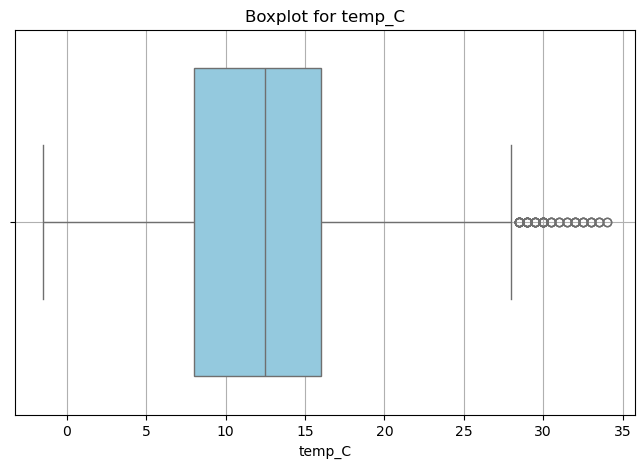

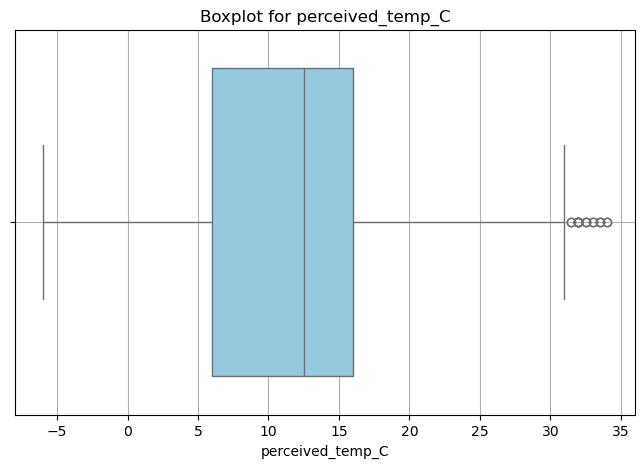

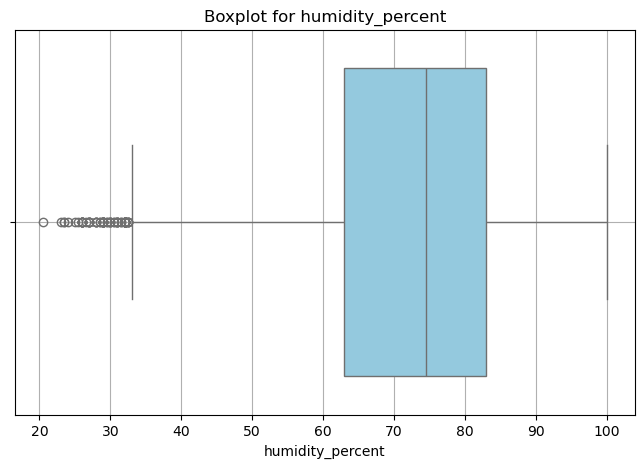

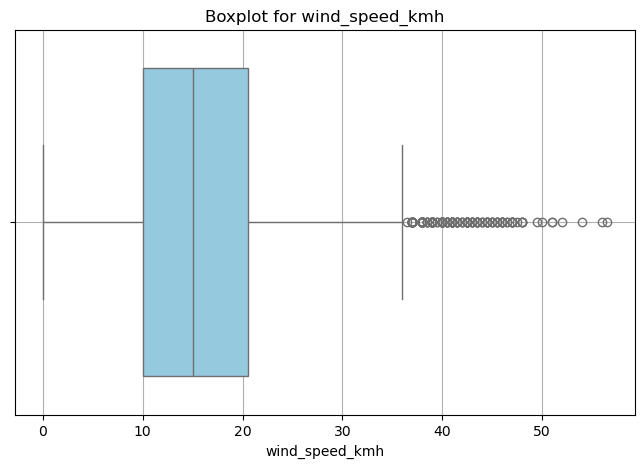

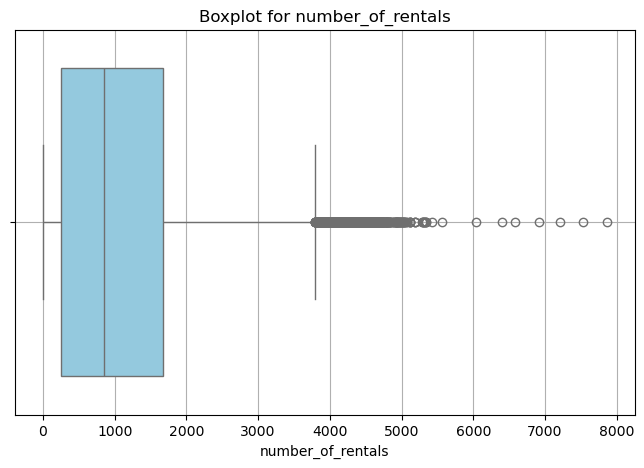

In [127]:
# Boxplot dla zmiennych numerycznych
numerical_cols = ["temp_C", "perceived_temp_C", "humidity_percent", "wind_speed_kmh", "number_of_rentals"]

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=col, color="skyblue")
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.grid()
    plt.show()

In [128]:
# Funkcja do wykrywania outlierów
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers

# Sprawdzenie outlierów w każdej zmiennej numerycznej
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"Number of outliers in {col}: {len(outliers)}")


Number of outliers in temp_C: 64
Number of outliers in perceived_temp_C: 19
Number of outliers in humidity_percent: 71
Number of outliers in wind_speed_kmh: 236
Number of outliers in number_of_rentals: 675


Note - even though there are many outliers in different features, we will assume that these are not caused by false measurements and every outlier is possible condition.